<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/pvalues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P-values are random variables
## by Fayyaz Minhas

Let's assume I give you two sets A and B of n = 3 random numbers each and a "null" hypothesis that the processes generating these two sets of numbers are such that the means of the two sets are the same. If we make an assumption that the generating processes for these sets are Gaussian with same variance, i.e., the numbers in each set are independent draws from Gaussian distributions with the same variance, then we can use the t-test to test this hypothesis. As the exact test or how that test works is not relevant to this discussion, we shall not bother explaining how the t-test actually works and instead we shall focus on the results of the t-test which like other statistical tests generates two things: a "t"-statistic, i.e., a value whose magnitude tells us something useful (in this case about the difference between means of A and B) and a "p-value" which tells us how likely, simply by chance, is it to get an extreme a statistic as we got from the test. Typically, p-values are used to make statements like "since p-value > 0.05, we fail to reject the null hypothesis" meaning that we cannot confidently say whether the means are same (or different) or "since p-value < 0.05, we can reject the null hypothesis" meaning that the means are not the same. Different people can use different thresholds and different tests to test different hypotheses under different assumptions. For example, we can measure the degree of correlation between two random variables using pearson correlation and use p-values there to see if the correlation is statistically significant or not. However, what most people fail to acknowledge is the fact that p-values are random variables themeselves. In this notebook we shall see this in action. This has implications on how p-values are interpreted and how using p-values alone without measuring corresponding effect sizes can be a bad idea. If you want to explore more on this, please see [this paper](https://royalsocietypublishing.org/doi/10.1098/rsbl.2019.0174) that advocates avoiding p-values. You can also watch [this video](https://www.youtube.com/watch?v=ncqcFNHmMoc) by NN Taleb his papers on the subject [1](https://fooledbyrandomness.com/pvalues.pdf)[2](https://arxiv.org/pdf/1603.07532).


Let's generate $n = 3$ random numbers in two sets $a$ and $b$. First we generate them in a way that their means are truly identical and use the t-test to get the corresponding p-value. We do this for a number of trials and plot the cumulative histogram of p-values.

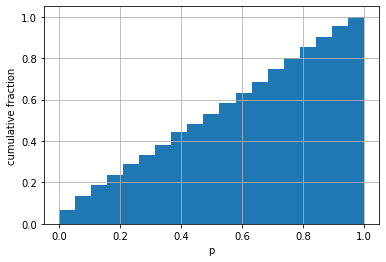

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
#let's generate data from the same distribution, n samples at a time and apply the t-test
n = 3
T = [];P=[]; bins = np.linspace(0,1,int(1/0.05))
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();
#note that the p-values are uniformly distributed


Note that the probability of observing a p-value < 0.05 is actually 0.05 (notice the first bin). Thus, as expected based on the definition of the p-value, there is a 5% chance for us to (wrongly) reject the null hypothesis and say that the means not same when, in reality, they are!

Let's redo the above experiment when the means are actually different. Notice the different "loc" parameter in the code below.

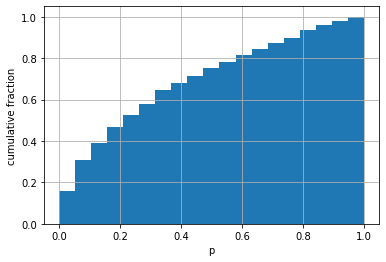

In [ ]:
#let's redo this experiment with two different distributions

T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=1.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();


Notice that the fraction of trials in which the p-value is less than 0.05 (first bin) is now larger. However, because the sample size is too small, we may not be able to reject the null hypothesis for more than 80% of the trails even though it is false.

To understand this better, let's redo the trials but this time with a larger difference between the means.

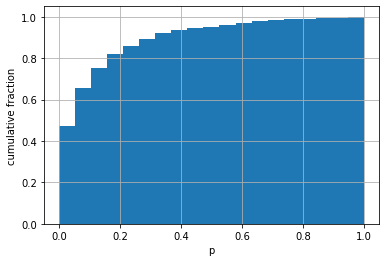

In [ ]:
#note that the distribution is a bit more skewed towards 0.0
#As the difference between the means becomes larger, the more skewed it becomes

T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=2.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();

As expected, the proportion of p-values < 0.05 has now increased to about 50%. However, we would still be unable to reject the null hypothesis in the remaining cases. Let's try with a larger difference between the means.

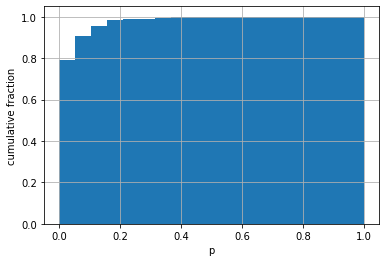

In [ ]:
#note that the distribution is a bit more skewed towards 0.0
#As the difference between the means becomes larger, the more skewed it becomes

T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=3.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();

Again, as expected, the proportion of p-values < 0.05 has now increased to about 80%. Let's increase the difference further.

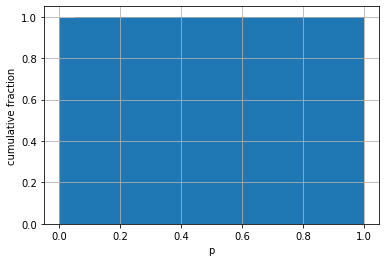

In [ ]:
#note that the distribution is a bit more skewed towards 0.0
#As the difference between the means becomes larger, the more skewed it becomes

T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=5.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();

Now, because the effect size is quite large, we can reject the null hypothesis for all the time.

Let's redo this experiment by increasing the number of samples (from 3 to 10) but with a small difference (1.0) between the means.


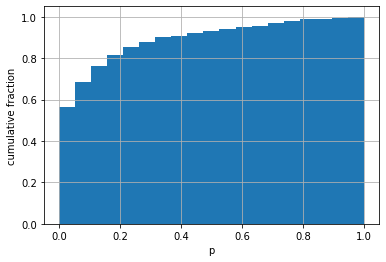

In [ ]:
n = 10
T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=1.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();

As we can see above, increasing the number of samples allows us to reject the null hypothesis more than 50% of the time as opposed to ~15% for the same difference in means when the number of samples was n = 3.

Let's see what happends when we increase the number of samples even further to n = 40.



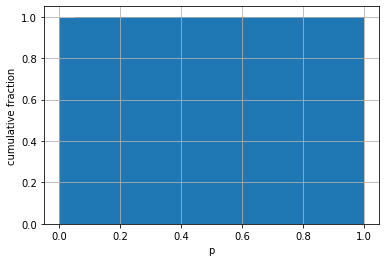

In [ ]:
n = 40
T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=1.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();

As we can see, now that we have a larger sample size, we can reject the null hypothesis for all trials.

The lesson from this exercise are:

1. P-values are random variables themeselves. You can expect to see different p-values if you repeat your experiment.
2. If you see a p-value < 0.05 in one particular outcome of your experiment (esp. with a small sample size), this can happen simply due to chance and your findings may not be reproducible on a larger sample. Search for data dredging or p-value hacking online and don't do it.
3. Unless your true effect size or sample size is large, you may not have enough "[statistical power](https://en.wikipedia.org/wiki/Power_of_a_test)" to reject the null hypothesis even if the null hypothesis is false.
4. It is important to keep the assumptions of the statistical test in mind when using p-values or tests for accepting or rejecting hypothesis.
5. If you are unable to reject the null hypothesis, this "negative result" be still be used to get an idea of an effective number of samples for your experiment using power analysis as described below. In such scenarios, use independent new samples to see if the hypothesis holds or not. You may need to use other strategies for power-law estimation depending upon the precise test being used.

In [ ]:
from statsmodels.stats.power import TTestIndPower
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt
def cohend(d1, d2):
  # calculate the size of samples
  n1, n2 = len(d1), len(d2)
  # calculate the variance of the samples
  s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
  # calculate the pooled standard deviation
  s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
  # calculate the means of the samples
  u1, u2 = mean(d1), mean(d2)
  # calculate the effect size
  return (u1 - u2) / s

n = 3
a = stats.norm.rvs(loc=0,scale=1,size=n)
b = stats.norm.rvs(loc=1.0,scale=1,size=n)
t,p = stats.ttest_ind(a,b)
print("p-value when the null-hypothesis is false for n = 3 is",p)
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = cohend(a,b)
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

p-value when the null-hypothesis is false for n = 3 is 0.673537989079062
Sample Size: 115.334


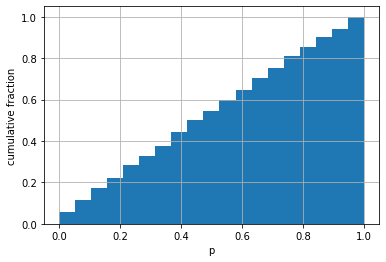

In [ ]:
n = 16
T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=0.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();

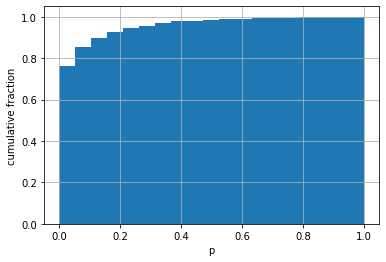

In [ ]:
T = [];P=[]
for _ in range(1000):
  a = stats.norm.rvs(loc=0,scale=1,size=n)
  b = stats.norm.rvs(loc=1.0,scale=1,size=n)
  t,p = stats.ttest_ind(a,b)
  P.append(p);T.append(t)

plt.hist(P,cumulative=True, bins = bins, density = True);plt.xlabel('p');plt.ylabel('cumulative fraction');plt.grid();plt.show();